In [96]:
#Importing necessary libraries
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pygame
import time

In [97]:
#Function to give details of the image
def image_details(url):
    img = cv2.imread(url, cv2.IMREAD_GRAYSCALE)
    print(img)
    print(f"Image Size : {img.size}")
    print(f"Image Shape : {img.shape}")
    plt.imshow(img, cmap="gray")
    plt.show()
    return img

[[30 10 40 ... 70 50 10]
 [ 0 50 80 ...  0 60 70]
 [90 80 20 ... 80 10 20]
 ...
 [40 40 10 ... 80 50  0]
 [60  0 10 ... 20 30 90]
 [80 60 40 ... 10 10 20]]
Image Size : 2500
Image Shape : (50, 50)


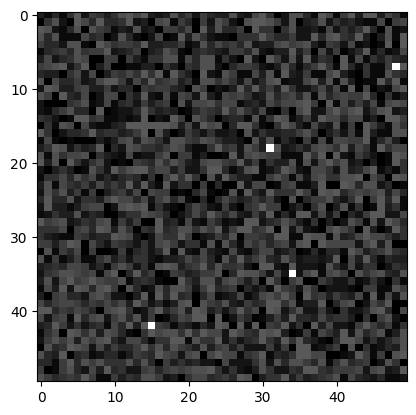

In [98]:
img = image_details("pi_image.png")

In [99]:
pixel_values = (img//10)
print(pixel_values)

[[3 1 4 ... 7 5 1]
 [0 5 8 ... 0 6 7]
 [9 8 2 ... 8 1 2]
 ...
 [4 4 1 ... 8 5 0]
 [6 0 1 ... 2 3 9]
 [8 6 4 ... 1 1 2]]


In [100]:
with open("pi_50x50.txt", "r") as file:
    pi_digits = [int(num) for line in file for num in line.strip().split(',')]
pi_digits = np.array(pi_digits)
pi_digits = pi_digits.reshape(50,50)
print(pi_digits)

[[3 1 4 ... 7 5 1]
 [0 5 8 ... 0 6 7]
 [9 8 2 ... 8 1 2]
 ...
 [4 4 1 ... 8 5 0]
 [6 0 1 ... 2 3 9]
 [8 6 4 ... 1 1 2]]


In [101]:
dist_digits = []
for a,A in zip(pixel_values, pi_digits):
    for b,B in zip(a,A):
        if b!=B:
            print(b,B) 
            dist_digits.append(B)
print(dist_digits)

25 0
25 8
25 3
25 9
[0, 8, 3, 9]


In [102]:
filter = np.floor(np.multiply(dist_digits, 10*np.pi))
filter = filter.astype('int') 
filter = filter.reshape(2,2)
filter

array([[  0, 251],
       [ 94, 282]])

[[ 59  27  68 ...  29  61  29]
 [158 192 158 ... 199 152 198]
 [ 59  27  59 ...  28  63 101]
 ...
 [251 164 250 ... 184 233 183]
 [ 95 126  88 ... 108  76 108]
 [250 164 250 ... 184 230 184]]
Image Size : 10000
Image Shape : (100, 100)


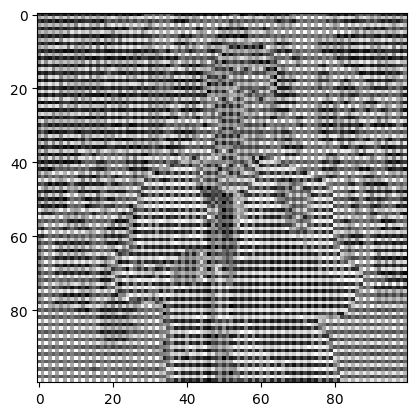

In [103]:
artwork = image_details("artwork_picasso.png")

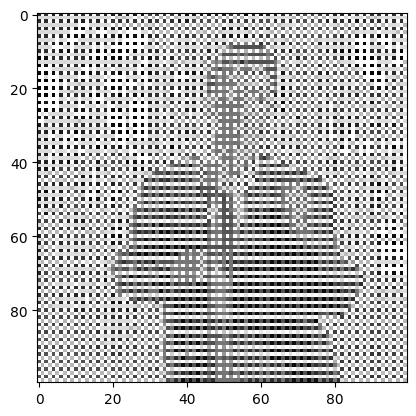

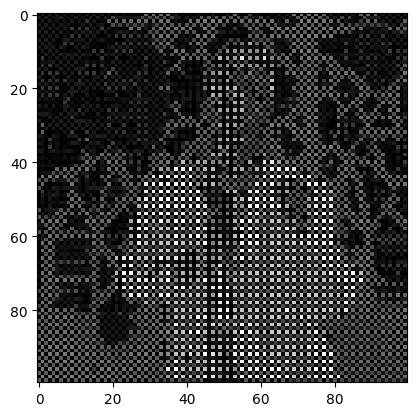

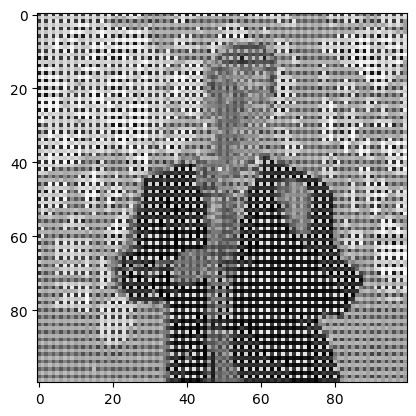

In [104]:
pic = artwork.copy()
height,width = pic.shape
for i in range(0,height-1,2):
    for j in range(0,width-1,2):
        pic[i,j] |= filter[0,0]
        pic[i,j+1] |= filter[0,1]
        pic[i+1,j] |= filter[1,0]
        pic[i+1,j+1] |= filter[1,1]
plt.imshow(pic, cmap="gray")
plt.show()

pic = artwork.copy()
height,width = pic.shape
for i in range(0,height-1,2):
    for j in range(0,width-1,2):
        pic[i,j] &= filter[0,0]
        pic[i,j+1] &= filter[0,1]
        pic[i+1,j] &= filter[1,0]
        pic[i+1,j+1] &= filter[1,1]
plt.imshow(pic, cmap="gray")
plt.show()

pic = artwork.copy()
height,width = pic.shape
for i in range(0,height-1,2):
    for j in range(0,width-1,2):
        pic[i,j] ^= filter[0,0]
        pic[i,j+1] ^= filter[0,1]
        pic[i+1,j] ^= filter[1,0]
        pic[i+1,j+1] ^= filter[1,1]
plt.imshow(pic, cmap="gray")
plt.show()

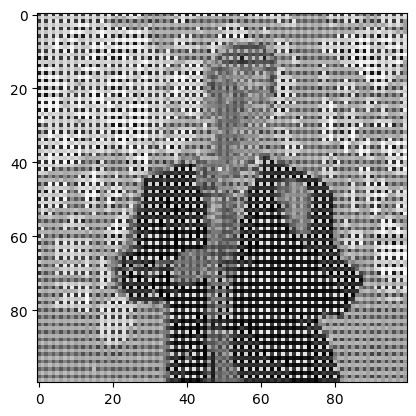

In [105]:
pic = artwork.copy()
height,width = pic.shape
for i in range(0,height-1,2):
    for j in range(0,width-1,2):
        pic[i,j] ^= filter[0,0]
        pic[i,j+1] ^= filter[0,1]
        pic[i+1,j] ^= filter[1,0]
        pic[i+1,j+1] ^= filter[1,1]
plt.imshow(pic, cmap="gray")
plt.show()

[[192 192 192 ...   0   0   0]
 [192 192 192 ...   0   0   0]
 [192 192 192 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
Image Size : 640000
Image Shape : (800, 800)


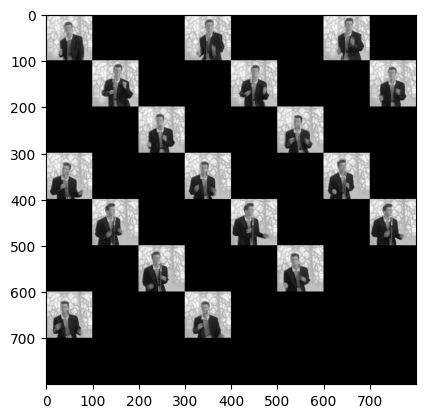

In [106]:
template = pic
collage = image_details("collage.png")

In [107]:
def template_matching(image, template):
    error = (image - template)**2
    error = np.sum(error)
    return error

In [108]:
"""h,w = collage.shape
min_error = np.inf
for i in range(0,h-99):
    for j in range(i%300,w-99):
        sample = collage[i:i+100,j:j+100]
        error = template_matching(sample,template)
        print(error)
        if(error<min_error):
            min_error = error
            x,y = i,j
print(x,y)"""

h,w = collage.shape
min_error = np.inf
for i in range(0,h-199,100):
    for j in range(i%300,w-99,300):
        sample = collage[i:i+100,j:j+100]
        error = template_matching(sample,template)
        print(error)
        if(error<min_error):
            min_error = error
            x,y = i,j
print(x,y)

860625
845004
820753
687340
825641
858644
877910
886804
903751
924090
914777
948376
950069
943402
941611
946230
939218
931075
1060841
100 100


In [109]:
(100+100)*np.pi

628.3185307179587

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
Image Size : 168618
Image Shape : (358, 471)


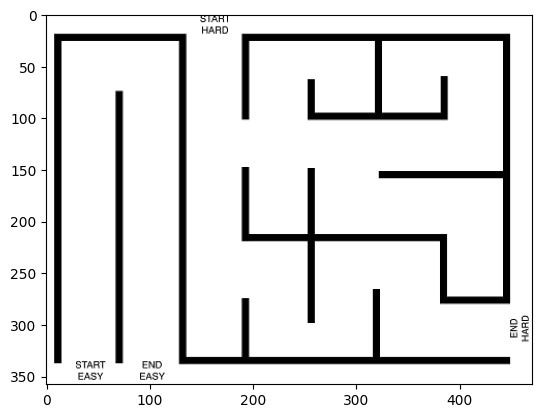

In [110]:
maze_img = image_details("maze.png")

In [111]:
maze_img[338,67]

250

In [112]:
maze_img[330,441]

255

In [113]:
"""maze_img[20,448]
maze_img[338,8]
maze_area = maze_img[19:338,8:448]
plt.imshow(maze_area, cmap="gray")
plt.show()"""

'maze_img[20,448]\nmaze_img[338,8]\nmaze_area = maze_img[19:338,8:448]\nplt.imshow(maze_area, cmap="gray")\nplt.show()'

In [114]:
class Node:
    def __init__(self,point,parent=None):
        self.coordinate = point
        self.parent = parent

In [ ]:
STEPSIZE = 5
list_of_nodes = np.array([])
def add_node(maze_copy,surface):
    global list_of_nodes
    while(1):
        random_point = np.array([np.random.randint(0, 470),
        np.random.randint(0, 357)])
        node = find_nearest_node(Node(random_point)) 
        x = node.coordinate[0]
        y = node.coordinate[1]
        direction = random_point - node.coordinate
        magnitude = np.linalg.norm(direction)
        if(magnitude!=0):
            direction = direction / magnitude
            new_x = int(np.ceil(x + STEPSIZE*direction[0]))
            if(new_x<15):
                new_x = 15
            if(new_x>441):
                new_x = 441
            new_y = int(np.ceil(y + STEPSIZE*direction[1]))
            if(new_y<26):
                new_y = 26
            if(new_y>330):
                new_y = 330
            if(maze_copy[new_x,new_y,0] == 255 or (maze_copy[new_x,new_y] == [0,255,0]).all()):
                new_node = Node([new_x,new_y],node)
                list_of_nodes = np.append(list_of_nodes,new_node)
                #pygame.draw.line(surface, (0,0,255), new_node.parent.coordinate, new_node.coordinate, 2)
                return new_node

def draw_node(node,screen):
    pygame.draw.circle(screen, (0, 0, 0), node.coordinate, 1)
    

def find_nearest_node(random_point):
    min_dist = 100000
    global list_of_nodes
    for node in list_of_nodes:
        diff = random_point.coordinate - node.coordinate
        dist = np.sqrt(np.sum(np.square(diff)))
        if(dist<min_dist):
            min_dist = dist
            min_node = node
    return min_node

def backtrack(node,screen):
    tot_distance = 0
    while(1):
        pygame.draw.line(screen, (0,255,0), node.parent.coordinate, node.coordinate, 2)
        pygame.display.update()
        node = node.parent
        if(node.parent == None):
            break
        time.sleep(0.01)



In [116]:
maze_rgb = cv2.cvtColor(maze_img, cv2.COLOR_GRAY2RGB)
maze_copy = cv2.flip(maze_rgb, 0)
maze_copy = cv2.rotate(maze_copy, cv2.ROTATE_90_CLOCKWISE)
pygame.init()
WIDTH, HEIGHT = maze_rgb.shape[1], maze_rgb.shape[0]
screen = pygame.display.set_mode((WIDTH, HEIGHT))


start, goal = None, None
found = False
running = True
list_of_nodes = []
while running:
    maze_surface = pygame.surfarray.make_surface(np.transpose(maze_rgb, (1, 0, 2)))
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False

        if event.type == pygame.MOUSEBUTTONDOWN and start is None:
            x, y = event.pos
            if(x>8 and x<448 and y>19 and y<338 and not(maze_copy[x,y]==[0,0,0]).all()):
                start = np.array([x, y])
                start_node = Node(start)
                list_of_nodes = np.append(list_of_nodes,start_node)
        elif event.type == pygame.MOUSEBUTTONDOWN and goal is None:
            x, y = event.pos
            if(x>8 and x<448 and y>19 and y<338 and not(maze_copy[x,y]==[0,0,0]).all()):
                goal = np.array([x, y])

            
    screen.blit(maze_surface, (0, 0))

    if start is not None:
        pygame.draw.circle(screen, (255, 0, 0), start, 5) 
    if goal is not None:
        pygame.draw.circle(screen, (0, 255, 0), goal, 5) 
        new_node = add_node(maze_copy,maze_surface)
        for node in list_of_nodes:
            draw_node(node,screen)
            if(node != start_node):
                pygame.draw.line(screen, (0,0,255), node.parent.coordinate, node.coordinate, 1)
        if((abs(new_node.coordinate-goal)<20).all()):
            print("Goal Found")
            found = True
        
    pygame.display.update()
    if(found):
        backtrack(new_node,screen)
        time.sleep(10)
        break
        
    
#pygame.image.save(screen, "9hard.png")
pygame.quit()


In [ ]:
"""RRT* Path Planning Algorithm"""

"""import numpy as np
import pygame
import cv2
import random
from scipy.spatial import KDTree
import time

class Node:
    def __init__(self, point, parent=None):
        self.coordinate = tuple(point)
        self.parent = parent
        self.cost = 0

STEPSIZE = 7
NEIGHBOR_RADIUS = 20
BIAS_PROB = 0.1  # 10% probability of sampling the goal
MAX_OPTIMIZATION_STEPS = 100  # Limit optimization steps
global goal
list_of_nodes = []

def is_collision_free(x1, y1, x2, y2, maze):
    line = np.linspace((x1, y1), (x2, y2), num=100)
    for x, y in line:
        if maze[int(y), int(x), 0] == 0:
            return False
    return True

def find_nearest_node(random_point):
    min_dist = float('inf')
    min_node = None
    for node in list_of_nodes:
        dist = np.linalg.norm(np.array(random_point) - np.array(node.coordinate))
        if dist < min_dist:
            min_dist = dist
            min_node = node
    return min_node

def get_neighbors(new_node, radius):
    neighbors = []
    for node in list_of_nodes:
        if np.linalg.norm(np.array(new_node.coordinate) - np.array(node.coordinate)) < radius:
            neighbors.append(node)
    return neighbors

def add_node(maze_copy, surface):
    global list_of_nodes, goal
    while True:
        if goal is not None and random.random() < BIAS_PROB:
            random_point = goal  # Bias towards goal
        else:
            random_point = np.array([np.random.randint(0, 470), np.random.randint(0, 357)])
        
        nearest_node = find_nearest_node(random_point)
        if nearest_node is None:
            continue
        x, y = nearest_node.coordinate
        direction = random_point - np.array(nearest_node.coordinate)
        magnitude = np.linalg.norm(direction)
        if magnitude != 0:
            direction = direction / magnitude
            new_x = int(np.clip(x + STEPSIZE * direction[0], 15, 441))
            new_y = int(np.clip(y + STEPSIZE * direction[1], 26, 330))
            if maze_copy[new_y, new_x, 0] == 255:
                new_node = Node([new_x, new_y], nearest_node)
                new_node.cost = nearest_node.cost + np.linalg.norm(direction * STEPSIZE)
                neighbors = get_neighbors(new_node, NEIGHBOR_RADIUS)
                
                # Choose best parent
                best_parent = nearest_node
                min_cost = new_node.cost
                for neighbor in neighbors:
                    temp_cost = neighbor.cost + np.linalg.norm(np.array(new_node.coordinate) - np.array(neighbor.coordinate))
                    if temp_cost < min_cost and is_collision_free(*neighbor.coordinate, *new_node.coordinate, maze_copy):
                        best_parent = neighbor
                        min_cost = temp_cost
                
                new_node.parent = best_parent
                new_node.cost = min_cost
                list_of_nodes.append(new_node)
                
                # Rewire step
                for neighbor in neighbors:
                    new_cost = new_node.cost + np.linalg.norm(np.array(new_node.coordinate) - np.array(neighbor.coordinate))
                    if new_cost < neighbor.cost and is_collision_free(*new_node.coordinate, *neighbor.coordinate, maze_copy):
                        neighbor.parent = new_node
                        neighbor.cost = new_cost
                return new_node

def backtrack(node, screen):
    while node.parent is not None:
        pygame.draw.line(screen, (0, 255, 0), node.parent.coordinate, node.coordinate, 2)
        pygame.display.update()
        node = node.parent
        time.sleep(0.01)

def optimize_path(screen, maze_copy):
    for _ in range(MAX_OPTIMIZATION_STEPS):
        new_node = add_node(maze_copy, screen)  # Add new nodes during optimization
        neighbors = get_neighbors(new_node, NEIGHBOR_RADIUS)
        for neighbor in neighbors:
            new_cost = new_node.cost + np.linalg.norm(np.array(new_node.coordinate) - np.array(neighbor.coordinate))
            if new_cost < neighbor.cost and is_collision_free(*new_node.coordinate, *neighbor.coordinate, maze_copy):
                neighbor.parent = new_node
                neighbor.cost = new_cost
        
        pygame.event.pump()
        screen.fill((255, 255, 255))
        maze_surface = pygame.surfarray.make_surface(np.transpose(maze_copy, (1, 0, 2)))
        screen.blit(maze_surface, (0, 0))
        for node in list_of_nodes:
            if node.parent is not None:
                pygame.draw.line(screen, (0, 0, 255), node.parent.coordinate, node.coordinate, 1)
        pygame.display.update()

maze_img = cv2.imread('maze.png', cv2.IMREAD_GRAYSCALE)
maze_rgb = cv2.cvtColor(maze_img, cv2.COLOR_GRAY2RGB)
pygame.init()
WIDTH, HEIGHT = maze_rgb.shape[1], maze_rgb.shape[0]
screen = pygame.display.set_mode((WIDTH, HEIGHT))

start, goal = None, None
found = False
running = True
list_of_nodes = []
while running:
    maze_surface = pygame.surfarray.make_surface(np.transpose(maze_rgb, (1, 0, 2)))
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
        if event.type == pygame.MOUSEBUTTONDOWN:
            x, y = event.pos
            if start is None and maze_rgb[y, x, 0] == 255:
                start = np.array([x, y])
                start_node = Node(start)
                list_of_nodes.append(start_node)
            elif goal is None and maze_rgb[y, x, 0] == 255:
                goal = np.array([x, y])
    
    screen.blit(maze_surface, (0, 0))
    if start is not None:
        pygame.draw.circle(screen, (255, 0, 0), start, 5)
    if goal is not None:
        pygame.draw.circle(screen, (0, 255, 0), goal, 5)
        new_node = add_node(maze_rgb, maze_surface)
        for node in list_of_nodes:
            if node.parent is not None:
                pygame.draw.line(screen, (0, 0, 255), node.parent.coordinate, node.coordinate, 1)
        if np.linalg.norm(np.array(new_node.coordinate) - np.array(goal)) < 20:
            print("Goal Found")
            found = True
    
    pygame.display.update()
    pygame.event.pump()
    
    if found:
        while running:
            optimize_path(screen, maze_rgb)
            best_goal_node = min([node for node in list_of_nodes if np.linalg.norm(np.array(node.coordinate) - np.array(goal)) < 20], key=lambda n: n.cost, default=new_node)
            backtrack(best_goal_node, screen)
            pygame.image.save(screen, "output.png")
pygame.quit()"""


'import numpy as np\nimport pygame\nimport cv2\nimport random\nfrom scipy.spatial import KDTree\nimport time\n\nclass Node:\n    def __init__(self, point, parent=None):\n        self.coordinate = tuple(point)\n        self.parent = parent\n        self.cost = 0\n\nSTEPSIZE = 7\nNEIGHBOR_RADIUS = 20\nBIAS_PROB = 0.1  # 10% probability of sampling the goal\nMAX_OPTIMIZATION_STEPS = 100  # Limit optimization steps\nglobal goal\nlist_of_nodes = []\n\ndef is_collision_free(x1, y1, x2, y2, maze):\n    line = np.linspace((x1, y1), (x2, y2), num=100)\n    for x, y in line:\n        if maze[int(y), int(x), 0] == 0:\n            return False\n    return True\n\ndef find_nearest_node(random_point):\n    min_dist = float(\'inf\')\n    min_node = None\n    for node in list_of_nodes:\n        dist = np.linalg.norm(np.array(random_point) - np.array(node.coordinate))\n        if dist < min_dist:\n            min_dist = dist\n            min_node = node\n    return min_node\n\ndef get_neighbors(new_nod

In [ ]:
"""A* Path Planning Algorithm"""

"""import numpy as np
import pygame
import cv2
import heapq
import time

class Node:
    def __init__(self, point, parent=None, g_cost=0, h_cost=0):
        self.coordinate = tuple(point)
        self.parent = parent
        self.g_cost = g_cost  # Cost from start to this node
        self.h_cost = h_cost  # Heuristic cost to goal
    
    def f_cost(self):
        return self.g_cost + self.h_cost
    
    def __lt__(self, other):
        return self.f_cost() < other.f_cost()

MOVES = [(0, 1), (1, 0), (0, -1), (-1, 0), (1, 1), (-1, -1), (1, -1), (-1, 1)]

def is_valid(point, maze):
    x, y = point
    return 8 <= x < 448 and 19 <= y < 338 and maze[y, x, 0] == 255

def heuristic(point, goal):
    return np.linalg.norm(np.array(point) - np.array(goal))

def astar(maze, start, goal):
    open_set = []
    heapq.heappush(open_set, Node(start, None, 0, heuristic(start, goal)))
    visited = set()
    
    while open_set:
        current = heapq.heappop(open_set)
        
        if current.coordinate in visited:
            continue
        visited.add(current.coordinate)
        
        if current.coordinate == goal:
            return current
        
        for move in MOVES:
            new_point = (current.coordinate[0] + move[0], current.coordinate[1] + move[1])
            if is_valid(new_point, maze) and new_point not in visited:
                new_g_cost = current.g_cost + np.linalg.norm(np.array(new_point) - np.array(current.coordinate))
                new_node = Node(new_point, current, new_g_cost, heuristic(new_point, goal))
                heapq.heappush(open_set, new_node)
    return None

def backtrack(node, screen):
    while node.parent is not None:
        pygame.draw.line(screen, (0, 255, 0), node.parent.coordinate, node.coordinate, 2)
        pygame.display.update()
        node = node.parent
        time.sleep(0.01)

maze_img = cv2.imread('maze.png', cv2.IMREAD_GRAYSCALE)
maze_rgb = cv2.cvtColor(maze_img, cv2.COLOR_GRAY2RGB)
pygame.init()
WIDTH, HEIGHT = maze_rgb.shape[1], maze_rgb.shape[0]
screen = pygame.display.set_mode((WIDTH, HEIGHT))

start, goal = None, None
running = True
while running:
    maze_surface = pygame.surfarray.make_surface(np.transpose(maze_rgb, (1, 0, 2)))
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
        if event.type == pygame.MOUSEBUTTONDOWN:
            x, y = event.pos
            if start is None and is_valid((x, y), maze_rgb):
                start = (x, y)
            elif goal is None and is_valid((x, y), maze_rgb):
                goal = (x, y)
    
    screen.blit(maze_surface, (0, 0))
    if start is not None:
        pygame.draw.circle(screen, (255, 0, 0), start, 5)
    if goal is not None:
        pygame.draw.circle(screen, (0, 255, 0), goal, 5)
        path_node = astar(maze_rgb, start, goal)
        if path_node:
            backtrack(path_node, screen)
            time.sleep(10)
            break
    
    pygame.display.update()
pygame.image.save(screen, "output.png")
pygame.quit()"""

'import numpy as np\nimport pygame\nimport cv2\nimport heapq\nimport time\n\nclass Node:\n    def __init__(self, point, parent=None, g_cost=0, h_cost=0):\n        self.coordinate = tuple(point)\n        self.parent = parent\n        self.g_cost = g_cost  # Cost from start to this node\n        self.h_cost = h_cost  # Heuristic cost to goal\n    \n    def f_cost(self):\n        return self.g_cost + self.h_cost\n    \n    def __lt__(self, other):\n        return self.f_cost() < other.f_cost()\n\nMOVES = [(0, 1), (1, 0), (0, -1), (-1, 0), (1, 1), (-1, -1), (1, -1), (-1, 1)]\n\ndef is_valid(point, maze):\n    x, y = point\n    return 8 <= x < 448 and 19 <= y < 338 and maze[y, x, 0] == 255\n\ndef heuristic(point, goal):\n    return np.linalg.norm(np.array(point) - np.array(goal))\n\ndef astar(maze, start, goal):\n    open_set = []\n    heapq.heappush(open_set, Node(start, None, 0, heuristic(start, goal)))\n    visited = set()\n    \n    while open_set:\n        current = heapq.heappop(open_

In [ ]:
import numpy as np
import pygame
import cv2
import time
import heapq

class Node:
    def __init__(self, point, cost=float('inf'), parent=None):
        self.coordinate = tuple(point)
        self.cost = cost
        self.parent = parent
    
    def __lt__(self, other):
        return self.cost < other.cost

MOVES = [(0, 2), (2, 0), (0, -2), (-2, 0), (2, 2), (-2, -2), (2, -2), (-2, 2)]

def is_valid(point, maze):
    x, y = point
    return 8 <= x < 448 and 19 <= y < 338 and maze[y, x, 0] == 255

def dijkstra(maze, start, goal):
    pq = []
    heapq.heappush(pq, Node(start, cost=0))
    visited = {}
    
    while pq:
        current = heapq.heappop(pq)
        
        if current.coordinate in visited and visited[current.coordinate] <= current.cost:
            continue
        visited[current.coordinate] = current.cost
        
        if current.coordinate == goal:
            return current
        
        for move in MOVES:
            new_point = (current.coordinate[0] + move[0], current.coordinate[1] + move[1])
            if is_valid(new_point, maze):
                new_cost = current.cost + np.linalg.norm(move)
                if new_point not in visited or new_cost < visited[new_point]:
                    heapq.heappush(pq, Node(new_point, new_cost, current))
    return None

def backtrack(node, screen):
    while node.parent is not None:
        pygame.draw.line(screen, (0, 255, 0), node.parent.coordinate, node.coordinate, 2)
        pygame.display.update()
        node = node.parent
        time.sleep(0.01)

maze_img = cv2.imread('maze.png', cv2.IMREAD_GRAYSCALE)
maze_rgb = cv2.cvtColor(maze_img, cv2.COLOR_GRAY2RGB)
pygame.init()
WIDTH, HEIGHT = maze_rgb.shape[1], maze_rgb.shape[0]
screen = pygame.display.set_mode((WIDTH, HEIGHT))

start, goal = None, None
running = True
while running:
    maze_surface = pygame.surfarray.make_surface(np.transpose(maze_rgb, (1, 0, 2)))
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
        if event.type == pygame.MOUSEBUTTONDOWN:
            x, y = event.pos
            if start is None and is_valid((x, y), maze_rgb):
                start = (x, y)
            elif goal is None and is_valid((x, y), maze_rgb):
                goal = (x, y)
    
    screen.blit(maze_surface, (0, 0))
    if start is not None:
        pygame.draw.circle(screen, (255, 0, 0), start, 5)
    if goal is not None:
        pygame.draw.circle(screen, (0, 255, 0), goal, 5)
        path_node = dijkstra(maze_rgb, start, goal)
        if path_node:
            backtrack(path_node, screen)
            time.sleep(10)
            break
    
    pygame.display.update()
pygame.image.save(screen, "output.png")
pygame.quit()


KeyboardInterrupt: 